<IPython.core.display.Javascript object>


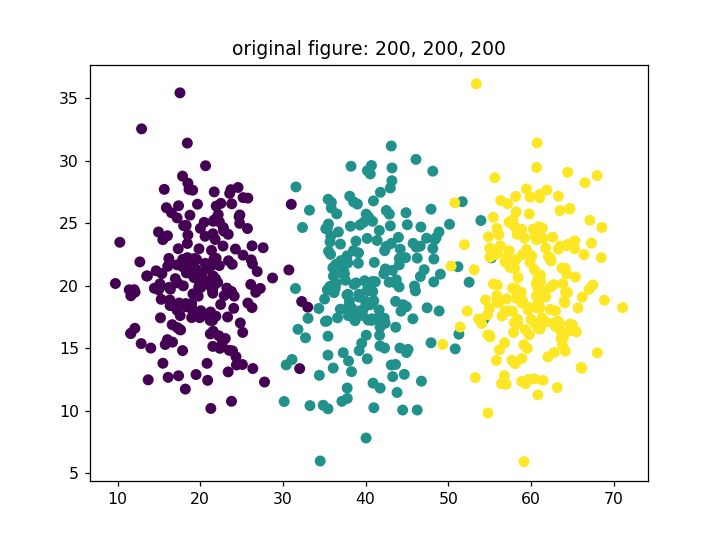

<IPython.core.display.Javascript object>


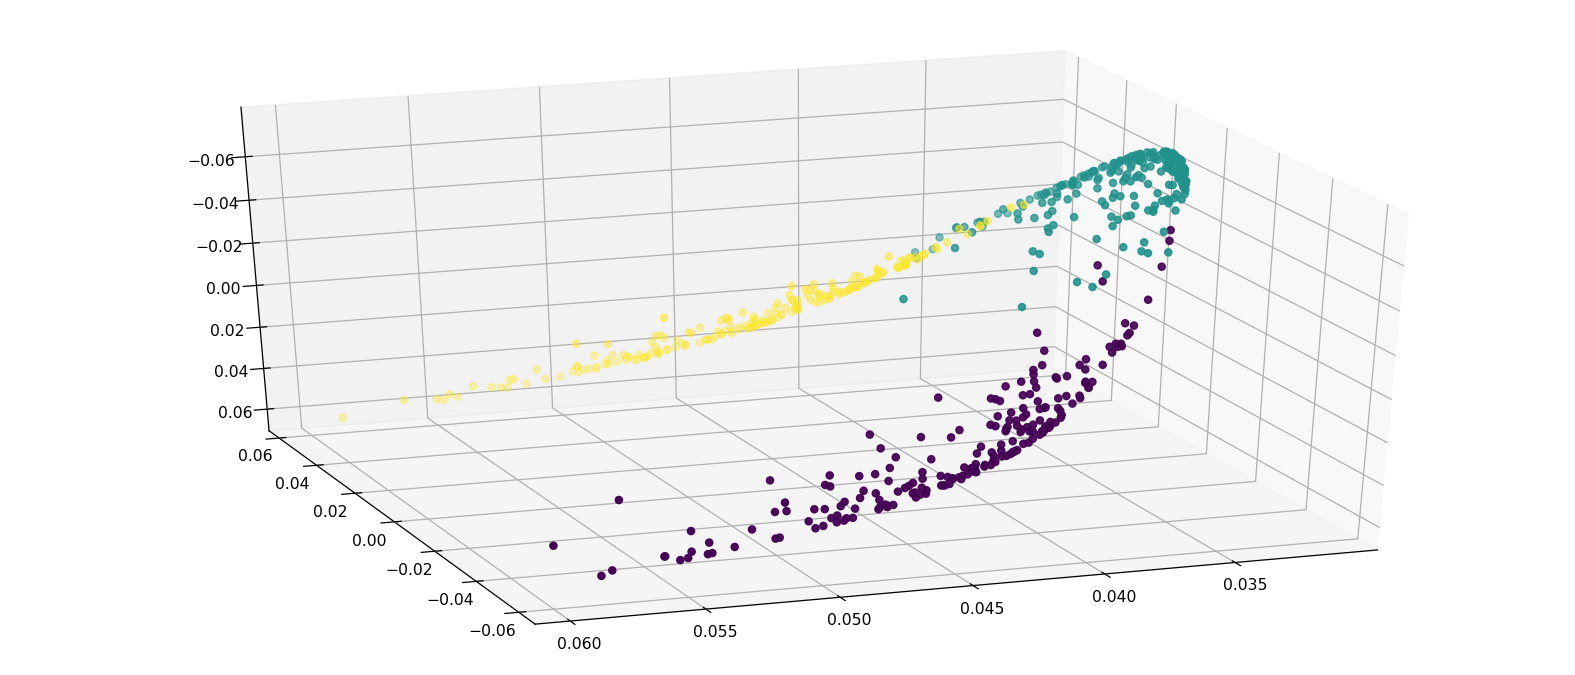

In [1]:
# synthetic dataset: Gaussian Circle dataset 
# 原图和对应谱空间流形

%matplotlib notebook
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from mpl_toolkits.mplot3d.axes3d import Axes3D

def synthetic_dataset(dataset_name='muti_Gaussian_circles'):
    # generate iris dataset or Gaussian circles and so on
    if dataset_name == "Gaussian_circles":
        # Gaussian circles
        feature, label = [], []
        cir_num = 3 # circles number
        cir_points_num = 100 # points number in a circles
        for i in range(1, cir_num+1):
            mean = [30 * i, 30]
            cov = [[15, 0], [0, 15]]
            fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
            feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
            #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
            label = np.append(label, i * np.ones(cir_points_num))
            
    # add different density circle distribution
    elif dataset_name == "Density_Gaussian_circles":
        # Gaussian circles
        feature, label = [], []
        cir_num = 3 # circles number
        cir_points_num = 200 # points number one circle
        mean = [20 * 1, 20]
        cov = [[20, 0], [0, 20]]
        fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
        feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        label = np.append(label, 1 * np.ones(cir_points_num))

        cir_points_num = 200 # points number one circle
        mean = [20 * 2, 20]
        cov = [[20, 0], [0, 20]]
        fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
        feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        label = np.append(label, 2 * np.ones(cir_points_num))
        
        cir_points_num = 200 # points number one circle
        mean = [20 * 3, 20]
        cov = [[20, 0], [0, 20]]
        fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
        feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        label = np.append(label, 3 * np.ones(cir_points_num))
        feature = np.asarray(feature)
        # plot Gaussian datasets
        plt.figure()
        plt.title("original figure: 200, 200, 200")
        plt.scatter(feature[:, 0], feature[:, 1], c=label)
        
    elif dataset_name == "muti_Gaussian_circles":
        feature, label = [], []
        cir_num = 6 # circles number
        cir_points_num = 100 # points number in a circles
        for i in range(1, cir_num+1):
            if 1 <= i <= 3:
                mean = [30 * i, 30]
            elif 4 <= i <= 6:
                mean = [30* (i - 3) - 15, 60]
            cov = [[40, 0], [0, 40]]
            fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
            feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
            #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
            label = np.append(label, i * np.ones(cir_points_num))
        feature = np.asarray(feature)
        # plot Gaussian datasets
        plt.figure()
        plt.title("original figure: 50, 200, 800)")
        plt.scatter(feature[:, 0], feature[:, 1], c=label)
        
    elif dataset_name == 'iris':
        # generate iris datasets
        iris = datasets.load_iris()
        feature = iris.data[:, :2]
        label = iris.target

        
    # construct distance matrix 
    dis_matrix = []
    for i in range(feature.shape[0]):
        for j in range(feature.shape[0]):
            dis_matrix.append(LA.norm(feature[i]-feature[j], 2))
    dis_matrix = np.reshape(dis_matrix, (feature.shape[0], feature.shape[0]))

    
    # compute eigenvectors
    w, v = LA.eig(dis_matrix)
    
    
    # 3D plot
    fig = plt.figure(figsize=(14,6))
    ax=Axes3D(fig, elev=-150, azim=110)
    ax.scatter(v[:, 0], v[:, 1], v[:, 2], c=label)
    plt.show()

    return feature, w, v, label

# dataset_name = "muti_Gaussian_circles" # dataset_name means which datasets will be choosed
feature, eig_values, eig_vectors, label = synthetic_dataset(dataset_name='Density_Gaussian_circles')    